In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_random_seed
import joblib
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteScaledError, MeanSquaredScaledError
from math import sqrt, ceil, floor

In [159]:
set_random_seed(0)

In [160]:
# import dataser from csv file
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [161]:
results = pd.DataFrame(columns=['idSku', 'target', 'prediction', 'flag_promo', 'target_promo', 'prediction_promo', 'target_no_promo', 'prediction_no_promo'])

In [ ]:
skus = train['idSku'].unique()

for s in skus:
    train_s = train[train['idSku'] == s]
    test_s = test[test['idSku'] == s]
    sku_s = pd.concat([train_s, test_s], ignore_index=True)
    sku_s = sku_s[['idSecuencia', 'udsVenta']]
    sku_s = sku_s.rename(columns={'idSecuencia': 'ds', 'udsVenta': 'y'})

    path = '../Neural_prophet_models/neural_prophet_' + str(s) + '.pkl'
    m = joblib.load(path)

    forecast = m.predict(sku_s, decompose=False, raw=True)
    pred = forecast['step0'].tail(len(test_s)).reset_index(drop=True).round().astype(int).tolist()
    target = test_s['udsVenta'].tolist()

    promo = test_s['promo'].reset_index(drop=True)
    flag_promo = len(promo.value_counts())

    pred_promo, pred_no_promo, target_promo, target_no_promo = [], [], [], []

    for i in range(len(pred)):
        if promo[i] == 1:
            pred_promo.append(pred[i])
            target_promo.append(target[i])
        else:
            pred_no_promo.append(pred[i])
            target_no_promo.append(target[i])

    # create a list with idSku, target and prediction
    r = pd.DataFrame([s, target, pred, flag_promo, target_promo, pred_promo, target_no_promo, pred_no_promo,]).T
    r.columns = ['idSku', 'target', 'prediction', 'flag_promo','target_promo', 'prediction_promo', 'target_no_promo', 'prediction_no_promo']
    results = results.append(r)

results = results.reset_index(drop=True)

In [163]:
results

,idSku,target,prediction,flag_promo,target_promo,prediction_promo,target_no_promo,prediction_no_promo
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 6, 18, 27...","[-2, 13, 10, 18, 7, 20, 16, 9, 16, 17, 19, 34,...",2,"[6, 18, 27, 0, 30, 18, 9, 21, 21, 12, 0, 12, 9...","[34, 13, 20, 4, 16, 22, 32, 30, 16, 29, 1, 12,...","[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 18, 12, 2...","[-2, 13, 10, 18, 7, 20, 16, 9, 16, 17, 19, 24,..."
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 15, 1...","[-3, 15, 20, 16, 13, 18, 23, -1, 13, 12, 21, 1...",2,"[15, 12, 12, 0, 9, 15, 18, 30, 27, 30, 0, 24, ...","[19, 15, 19, 0, 15, 14, 16, 15, 15, 27, 0, 14,...","[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 6, 27...","[-3, 15, 20, 16, 13, 18, 23, -1, 13, 12, 21, 1..."
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 0, 6, 27,...","[0, 6, 5, 5, 5, 5, 6, 0, 5, 4, 4, 4, 4, 4, 0, ...",2,"[0, 6, 27, 0, 3, 15, 0, 3, 0, 18, 0, 21, 12, 1...","[4, 4, 4, 0, 4, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2, ...","[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 3, 15, 6,...","[0, 6, 5, 5, 5, 5, 6, 0, 5, 4, 4, 0, 0, 0, 0, ..."
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 3, 6, 12, ...","[0, 10, 8, 9, 8, 8, 9, 0, 9, 7, 6, 7, 7, 12, 1...",2,"[3, 6, 12, 0, 12, 9, 9, 9, 6, 3, 0, 15, 0, 9, ...","[7, 7, 12, 1, 13, 8, 10, 8, 9, 8, 0, 11, 8, 9,...","[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 9, 6, 9, 3...","[0, 10, 8, 9, 8, 8, 9, 0, 9, 7, 6, 8, 8, 8, -1..."
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 3, 3, 0, ...","[9, 2, 3, 0, 1, 1, 2, 9, -1, 0, -5, -5, -5, -6...",2,"[0, 3, 3, 0, 6, 3, 9, 9, 0, 9, 0, 21, 18, 12, ...","[-5, -5, -6, 8, -9, -8, -10, -7, -8, -9, 1, -1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 15, 36, 9, 0...","[9, 2, 3, 0, 1, 1, 2, 9, -1, 0, -5, -21, -14, ..."
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 3, 9, 15, 0...","[0, 13, 10, 10, 9, 11, 12, 0, 13, 10, 10, 9, 1...",2,"[3, 9, 15, 0, 9, 24, 15, 24, 9, 12, 3, 30, 6, ...","[9, 11, 12, 0, 13, 10, 10, 9, 11, 12, 0, 13, 1...","[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 0, 9, 6, 0,...","[0, 13, 10, 10, 9, 11, 12, 0, 13, 10, 10, 9, 1..."
6,7,"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[0, 8, 8, 7, 7, 7, 4, 0, 7, 7, 6, 6, 6, 4, 0, ...",1,[],[],"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[0, 8, 8, 7, 7, 7, 4, 0, 7, 7, 6, 6, 6, 4, 0, ..."
7,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 8, 15, 6, 0...","[0, 8, 7, 8, 7, 6, 7, 0, 8, 7, 8, 7, 6, 7, 0, ...",2,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 12, 6, 15, ...","[0, 8, 7, 8, 7, 6, 7, 0, 8, 7, 8, 7, 6, 7, 0, ...","[8, 15, 6, 0, 6, 3, 0, 3, 0, 3, 0, 0, 0, 6, 9,...","[7, 6, 7, 0, 8, 7, 8, 7, 6, 7, 0, 8, 7, 8, 7, ..."
8,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 18, 15,...","[1, 13, 13, 16, 16, 18, 16, 1, 14, 14, 17, 18,...",2,"[18, 15, 14, 6, 15, 21, 21, 15, 15, 18, 9, 6, ...","[18, 20, 17, 1, 16, 15, 18, 19, 21, 19, 1, 17,...","[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 6, 15, ...","[1, 13, 13, 16, 16, 18, 16, 1, 14, 14, 17, 23,..."
9,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 6, 0, ...","[0, 5, 4, 3, 1, 3, 3, -1, 3, 2, 1, 1, 1, 3, 0,...",2,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 0, 9, ...","[0, 5, 4, 3, 1, 3, 3, -1, 3, 2, 1, 0, 0, 0, -1...","[9, 6, 0, 0, 15, 6, 10, 18, 9, 3, 0, 12, 0, 12...","[1, 1, 3, 0, 3, 2, 1, 1, 2, 1, -2, 1, -1, -1, ..."


In [164]:
# copy results
global_results = results.copy()
global_results = global_results[['idSku', 'target', 'prediction']]

In [165]:
# RMSE: Root Mean Squared Error
# MAPE: Mean Absolute Percentage Error
# MASE: Mean Absolute Scaled Error
# SMAPE: Symmetric Mean Absolute Percentage Error
# RMSSE: Root Mean Squared Scaled Error

global_results['RMSE'] = np.nan
global_results['MAPE'] = np.nan
global_results['MASE'] = np.nan
global_results['SMAPE'] = np.nan
global_results['RMSSE'] = np.nan

rmse = MeanSquaredError(square_root=True)
mape = MeanAbsolutePercentageError()
mase = MeanAbsoluteScaledError()
smape = MeanAbsolutePercentageError(symmetric=True)
rmsse = MeanSquaredScaledError(square_root=True)

# calculate rmse for each sku and append to global_results dataframe
for i in range(0, 50):
    t = pd.Series(global_results['target'][i])
    p = pd.Series(global_results['prediction'][i])
    y_train = train[train['idSku'] == i+1]['udsVenta']
    global_results['RMSE'][i] = rmse(t, p)
    global_results['MAPE'][i] = mape(t, p)
    global_results['MASE'][i] = mase(t, p, y_train=y_train)
    global_results['SMAPE'][i] = smape(t, p)
    global_results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
global_results

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\2383586600.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_results['RMSE'][i] = rmse(t, p)

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\2383586600.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_results['MAPE'][i] = mape(t, p)

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\2383586600.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

,idSku,target,prediction,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 6, 18, 27...","[-2, 13, 10, 18, 7, 20, 16, 9, 16, 17, 19, 34,...",12.362051,5.523946e+15,0.841922,0.737294,0.855065
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 15, 1...","[-3, 15, 20, 16, 13, 18, 23, -1, 13, 12, 21, 1...",9.223357,2.392537e+15,0.527232,0.595359,0.534643
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 0, 6, 27,...","[0, 6, 5, 5, 5, 5, 6, 0, 5, 4, 4, 4, 4, 4, 0, ...",13.922498,2.392537e+15,1.268952,1.578167,1.217148
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 3, 6, 12, ...","[0, 10, 8, 9, 8, 8, 9, 0, 9, 7, 6, 7, 7, 12, 1...",6.174545,5.629500e+15,0.546202,0.759157,0.596377
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 3, 3, 0, ...","[9, 2, 3, 0, 1, 1, 2, 9, -1, 0, -5, -5, -5, -6...",41.913788,6.720215e+15,3.684093,1.925781,3.310578
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 3, 9, 15, 0...","[0, 13, 10, 10, 9, 11, 12, 0, 13, 10, 10, 9, 1...",7.470776,4.398047e+15,0.559013,0.563912,0.605862
6,7,"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[0, 8, 8, 7, 7, 7, 4, 0, 7, 7, 6, 6, 6, 4, 0, ...",12.035105,1.020347e+15,1.249210,1.329954,1.320272
7,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 8, 15, 6, 0...","[0, 8, 7, 8, 7, 6, 7, 0, 8, 7, 8, 7, 6, 7, 0, ...",5.255949,5.383209e+15,0.684904,0.690199,0.690645
8,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 18, 15,...","[1, 13, 13, 16, 16, 18, 16, 1, 14, 14, 17, 18,...",15.200997,5.664684e+15,2.147366,0.832160,1.945533
9,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 6, 0, ...","[0, 5, 4, 3, 1, 3, 3, -1, 3, 2, 1, 1, 1, 3, 0,...",9.439776,4.327678e+15,1.427539,1.777991,1.313980


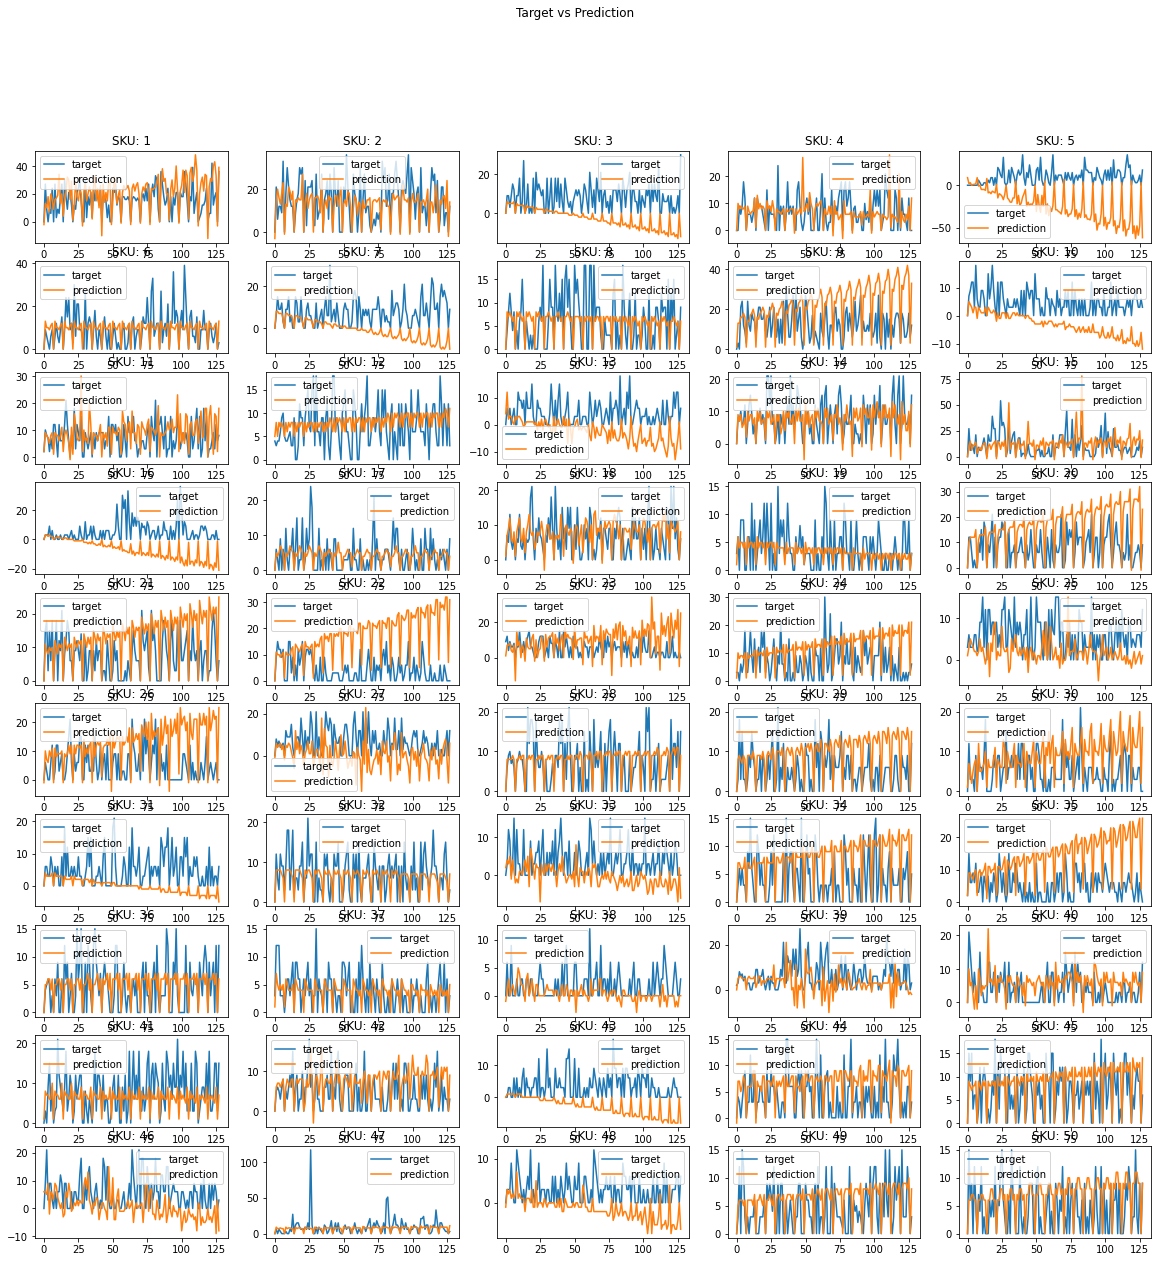

In [166]:
# make 50 subplots in a 10x5 grid and plot the target and prediction
fig, axs = plt.subplots(10, 5, figsize=(20, 20))
fig.suptitle('Target vs Prediction')
for i in range(10):
    for j in range(5):
        axs[i, j].plot(global_results['target'][i*5+j], label='target')
        axs[i, j].plot(global_results['prediction'][i*5+j], label='prediction')
        axs[i, j].legend()
        axs[i, j].set_title('SKU: ' + str(i*5+j+1))
plt.show()

In [167]:
# get the metrics of the results dataframe
metrics = global_results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     8.608427e+00
MAPE     6.254374e+15
MASE     1.171299e+00
SMAPE    1.027103e+00
RMSSE    1.129933e+00
dtype: float64

In [168]:
promo_comparison_results = results.copy()

# filter promo_comparison_results to get only the skus with flag_promo = 2
promo_comparison_results = promo_comparison_results[promo_comparison_results['flag_promo'] == 2]
promo_comparison_results = promo_comparison_results.reset_index(drop=True)

promo_skus = promo_comparison_results['idSku'].unique()

In [169]:
promo_results = promo_comparison_results[['idSku', 'target_promo', 'prediction_promo']]

In [170]:
promo_results = promo_comparison_results[['idSku', 'target_promo', 'prediction_promo']]

promo_results['RMSE'] = np.nan
promo_results['MAPE'] = np.nan
promo_results['MASE'] = np.nan
promo_results['SMAPE'] = np.nan
promo_results['RMSSE'] = np.nan

# calculate rmse for each sku and append to promo_results dataframe
i = 0
for ps in promo_skus:
    t = pd.Series(promo_results[promo_results['idSku'] == ps]['target_promo'].tolist()[0])
    p = pd.Series(promo_results[promo_results['idSku'] == ps]['prediction_promo'].tolist()[0])
    y_train = train[train['idSku'] == ps]['udsVenta']
    promo_results['RMSE'][i] = rmse(t, p)
    promo_results['MAPE'][i] = mape(t, p)
    promo_results['MASE'][i] = mase(t, p, y_train=y_train)
    promo_results['SMAPE'][i] = smape(t, p)
    promo_results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
    i+=1
promo_results

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\3942801977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_results['RMSE'] = np.nan

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\3942801977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_results['MAPE'] = np.nan

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\3942801977.py:5: SettingWithCopyWarning: 
A value is tr

,idSku,target_promo,prediction_promo,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[6, 18, 27, 0, 30, 18, 9, 21, 21, 12, 0, 12, 9...","[34, 13, 20, 4, 16, 22, 32, 30, 16, 29, 1, 12,...",11.532563,4.310588e+15,0.766625,0.645611,0.797690
1,2,"[15, 12, 12, 0, 9, 15, 18, 30, 27, 30, 0, 24, ...","[19, 15, 19, 0, 15, 14, 16, 15, 15, 27, 0, 14,...",8.581542,2.573486e+14,0.501748,0.565687,0.497440
2,3,"[0, 6, 27, 0, 3, 15, 0, 3, 0, 18, 0, 21, 12, 1...","[4, 4, 4, 0, 4, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2, ...",14.115847,1.672766e+15,1.314822,1.566892,1.234051
3,4,"[3, 6, 12, 0, 12, 9, 9, 9, 6, 3, 0, 15, 0, 9, ...","[7, 7, 12, 1, 13, 8, 10, 8, 9, 8, 0, 11, 8, 9,...",5.526559,2.573486e+15,0.492250,0.688153,0.533791
4,5,"[0, 3, 3, 0, 6, 3, 9, 9, 0, 9, 0, 21, 18, 12, ...","[-5, -5, -6, 8, -9, -8, -10, -7, -8, -9, 1, -1...",40.678179,2.959508e+15,3.693207,1.942857,3.212983
5,6,"[3, 9, 15, 0, 9, 24, 15, 24, 9, 12, 3, 30, 6, ...","[9, 11, 12, 0, 13, 10, 10, 9, 11, 12, 0, 13, 1...",8.601495,1.479754e+15,0.618536,0.483939,0.697560
6,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 12, 6, 15, ...","[0, 8, 7, 8, 7, 6, 7, 0, 8, 7, 8, 7, 6, 7, 0, ...",5.630888,3.571820e+15,0.705569,0.577343,0.739913
7,9,"[18, 15, 14, 6, 15, 21, 21, 15, 15, 18, 9, 6, ...","[18, 20, 17, 1, 16, 15, 18, 19, 21, 19, 1, 17,...",14.566105,6.047691e+15,2.036204,0.803677,1.864275
8,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 0, 9, ...","[0, 5, 4, 3, 1, 3, 3, -1, 3, 2, 1, 0, 0, 0, -1...",10.173495,2.329448e+15,1.556934,1.748680,1.416111
9,11,"[2, 10, 8, 7, 2, 7, 3, 12, 12, 6, 0, 6, 9, 9, ...","[2, 9, 8, 7, 5, 8, 9, 1, 9, 8, 8, 6, 9, 12, 0,...",6.625447,4.115358e+15,0.870486,0.701271,0.928989


In [171]:
# get the metrics of the results dataframe
metrics = promo_results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     9.056614e+00
MAPE     5.384987e+15
MASE     1.172992e+00
SMAPE    8.983001e-01
RMSSE    1.136090e+00
dtype: float64

In [172]:
non_promo_results = promo_comparison_results[['idSku', 'target_no_promo', 'prediction_no_promo']]

non_promo_results['RMSE'] = np.nan
non_promo_results['MAPE'] = np.nan
non_promo_results['MASE'] = np.nan
non_promo_results['SMAPE'] = np.nan
non_promo_results['RMSSE'] = np.nan

# calculate rmse for each sku and append to non_promo_results dataframe
i = 0
for ps in promo_skus:
    t = pd.Series(non_promo_results[non_promo_results['idSku'] == ps]['target_no_promo'].tolist()[0])
    p = pd.Series(non_promo_results[non_promo_results['idSku'] == ps]['prediction_no_promo'].tolist()[0])
    y_train = train[train['idSku'] == ps]['udsVenta']
    non_promo_results['RMSE'][i] = rmse(t, p)
    non_promo_results['MAPE'][i] = mape(t, p)
    non_promo_results['MASE'][i] = mase(t, p, y_train=y_train)
    non_promo_results['SMAPE'][i] = smape(t, p)
    non_promo_results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
    i+=1
non_promo_results

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\1772096320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_results['RMSE'] = np.nan

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\1772096320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_results['MAPE'] = np.nan

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_18360\1772096320.py:5: SettingWithCopyWarning: 
A val

,idSku,target_no_promo,prediction_no_promo,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 18, 12, 2...","[-2, 13, 10, 18, 7, 20, 16, 9, 16, 17, 19, 24,...",13.294412,6.988344e+15,0.932797,0.847946,0.919555
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 6, 27...","[-3, 15, 20, 16, 13, 18, 23, -1, 13, 12, 21, 1...",9.942941,4.969489e+15,0.557988,0.631169,0.576355
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 3, 15, 6,...","[0, 6, 5, 5, 5, 5, 6, 0, 5, 4, 4, 0, 0, 0, 0, ...",13.685507,3.261227e+15,1.213592,1.591774,1.196429
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 9, 6, 9, 3...","[0, 10, 8, 9, 8, 8, 9, 0, 9, 7, 6, 8, 8, 8, -1...",6.875744,9.317792e+15,0.611315,0.844851,0.664104
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 15, 36, 9, 0...","[9, 2, 3, 0, 1, 1, 2, 9, -1, 0, -5, -21, -14, ...",43.358171,1.125900e+16,3.673094,1.905172,3.424663
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 0, 9, 6, 0,...","[0, 13, 10, 10, 9, 11, 12, 0, 13, 10, 10, 9, 1...",5.820594,7.920123e+15,0.487176,0.660431,0.472036
6,8,"[8, 15, 6, 0, 6, 3, 0, 3, 0, 3, 0, 0, 0, 6, 9,...","[7, 6, 7, 0, 8, 7, 8, 7, 6, 7, 0, 8, 7, 8, 7, ...",4.923704,6.884074e+15,0.667781,0.783708,0.646987
7,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 6, 15, ...","[1, 13, 13, 16, 16, 18, 16, 1, 14, 14, 17, 23,...",15.933591,5.202434e+15,2.281527,0.866538,2.039296
8,10,"[9, 6, 0, 0, 15, 6, 10, 18, 9, 3, 0, 12, 0, 12...","[1, 1, 3, 0, 3, 2, 1, 1, 2, 1, -2, 1, -1, -1, ...",8.785540,5.983354e+15,1.320326,1.802277,1.222913
9,11,"[12, 6, 6, 6, 12, 21, 12, 6, 0, 8, 3, 18, 3, 1...","[6, 8, 11, 2, 8, 10, 8, 5, -1, 11, 1, 16, 12, ...",6.613838,4.825285e+15,0.933098,0.815420,0.927361


In [173]:
# get the metrics of the results dataframe
metrics = non_promo_results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     9.112059e+00
MAPE     8.876433e+15
MASE     1.238895e+00
SMAPE    9.947432e-01
RMSSE    1.162589e+00
dtype: float64